In [1]:
import zipfile
import py7zr
import os

# Define file paths
data_dir = "./"
extracted_dir = "./extracted/"

# Ensure the extraction directory exists
os.makedirs(extracted_dir, exist_ok=True)

# List of zip files
zip_files = [
    "training_text.zip",
    "training_variants.zip",
    "test_text.zip",
    "test_variants.zip",
]

# Extract zip files
for zip_file in zip_files:
    with zipfile.ZipFile(os.path.join(data_dir, zip_file), 'r') as zip_ref:
        zip_ref.extractall(extracted_dir)

# List of 7z files
sevenz_files = [
    "stage_2_private_solution.csv.7z",
    "stage2_test_text.csv.7z",
    "stage2_test_variants.csv.7z",
    "stage2_sample_submission.csv.7z",
    "stage1_solution_filtered.csv.7z",
]

# Extract 7z files
for sevenz_file in sevenz_files:
    with py7zr.SevenZipFile(os.path.join(data_dir, sevenz_file), mode='r') as archive:
        archive.extractall(extracted_dir)

# Check extracted files
os.listdir(extracted_dir)


['stage1_solution_filtered.csv',
 'stage2_sample_submission.csv',
 'stage2_test_text.csv',
 'stage2_test_variants.csv',
 'stage_2_private_solution.csv',
 'test_text',
 'test_variants',
 'training_text',
 'training_variants']

Training Variants Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3321 non-null   int64 
 1   Gene       3321 non-null   object
 2   Variation  3321 non-null   object
 3   Class      3321 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 103.9+ KB
None

Training Text Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3321 non-null   int64 
 1   Text    3316 non-null   object
dtypes: int64(1), object(1)
memory usage: 52.0+ KB
None

Test Variants Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5668 entries, 0 to 5667
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         5668 non-null   int64 
 1   Gen

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4



Training Text Head:


,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...



Missing Values:
Training Variants:
 ID           0
Gene         0
Variation    0
Class        0
dtype: int64
Training Text:
 ID      0
Text    5
dtype: int64
Test Variants:
 ID           0
Gene         0
Variation    0
dtype: int64
Test Text:
 ID      0
Text    1
dtype: int64

Merged Training Data Head:


,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...



Training Variants Description:


,ID,Gene,Variation,Class
count,3321.000000,3321,3321,3321.000000
unique,NaN,264,2996,NaN
top,NaN,BRCA1,Truncating Mutations,NaN
freq,NaN,264,93,NaN
mean,1660.000000,NaN,NaN,4.365854
std,958.834449,NaN,NaN,2.309781
min,0.000000,NaN,NaN,1.000000
25%,830.000000,NaN,NaN,2.000000
50%,1660.000000,NaN,NaN,4.000000
75%,2490.000000,NaN,NaN,7.000000


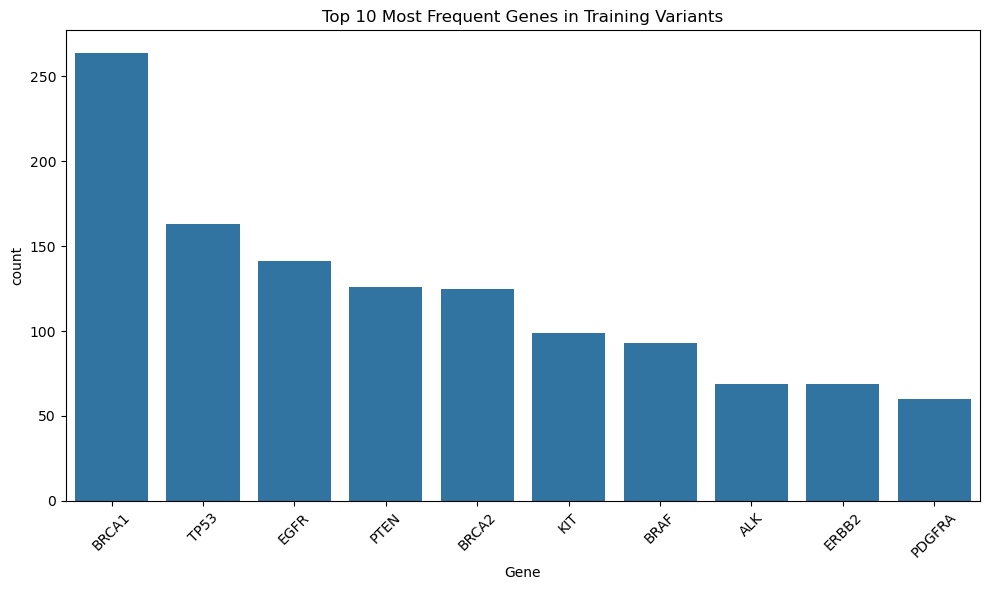

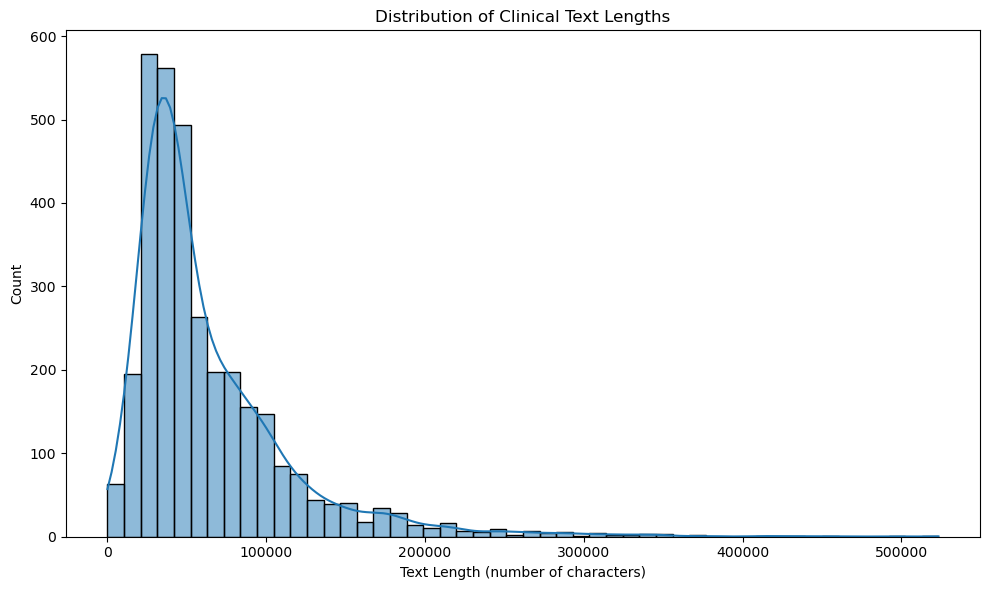

No 'Variant_Classification' column found in training_variants.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load extracted datasets (adjust file paths if needed)
training_variants = pd.read_csv("./extracted/training_variants")
training_text = pd.read_csv("./extracted/training_text", 
                            sep=r"\|\|", engine="python", 
                            names=["ID", "Text"], skiprows=1)

test_variants = pd.read_csv("./extracted/test_variants")
test_text = pd.read_csv("./extracted/test_text", 
                        sep=r"\|\|", engine="python", 
                        names=["ID", "Text"], skiprows=1)

# Display basic info on datasets
print("Training Variants Info:")
print(training_variants.info())
print("\nTraining Text Info:")
print(training_text.info())
print("\nTest Variants Info:")
print(test_variants.info())
print("\nTest Text Info:")
print(test_text.info())

# Show first few rows for a quick look
print("\nTraining Variants Head:")
display(training_variants.head())
print("\nTraining Text Head:")
display(training_text.head())

# Check for missing values in each dataset
print("\nMissing Values:")
print("Training Variants:\n", training_variants.isnull().sum())
print("Training Text:\n", training_text.isnull().sum())
print("Test Variants:\n", test_variants.isnull().sum())
print("Test Text:\n", test_text.isnull().sum())

# Merge the training datasets on the common ID column
train_merged = pd.merge(training_variants, training_text, on="ID")
print("\nMerged Training Data Head:")
display(train_merged.head())

# Basic statistics of the structured data
print("\nTraining Variants Description:")
display(training_variants.describe(include="all"))

# Exploratory Analysis: Distribution of genes
plt.figure(figsize=(10,6))
sns.countplot(data=training_variants, x="Gene", order=training_variants["Gene"].value_counts().iloc[:10].index)
plt.title("Top 10 Most Frequent Genes in Training Variants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Fill missing text values with an empty string before computing text length
train_merged['Text_Length'] = train_merged['Text'].fillna("").apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(10,6))
sns.histplot(train_merged['Text_Length'], bins=50, kde=True)
plt.title("Distribution of Clinical Text Lengths")
plt.xlabel("Text Length (number of characters)")
plt.tight_layout()
plt.show()

# Check distribution of variant types (if available, e.g., Variant_Classification)
if "Variant_Classification" in training_variants.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=training_variants, x="Variant_Classification", 
                  order=training_variants["Variant_Classification"].value_counts().index)
    plt.title("Variant Classification Distribution")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No 'Variant_Classification' column found in training_variants.")


In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Encode categorical features (Gene & Variation)
gene_encoder = LabelEncoder()
variation_encoder = LabelEncoder()
train_merged["Gene_Encoded"] = gene_encoder.fit_transform(train_merged["Gene"])
train_merged["Variation_Encoded"] = variation_encoder.fit_transform(train_merged["Variation"])

# TF-IDF vectorization of clinical text
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
text_tfidf = tfidf_vectorizer.fit_transform(train_merged["Text"].fillna("")).toarray()

# Standardize numeric data
scaler = StandardScaler()
numeric_features = scaler.fit_transform(train_merged[["Gene_Encoded", "Variation_Encoded"]])

# Combine TF-IDF features with structured numeric features
X = np.hstack((numeric_features, text_tfidf))
y = train_merged["Class"] - 1  # Convert classes to 0-based index

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the baseline DNN model
def build_dnn(input_dim):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(len(np.unique(y)), activation='softmax')  # Multi-class classification
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the model
model = build_dnn(X_train.shape[1])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=1)

# Evaluate model
y_pred = np.argmax(model.predict(X_val), axis=1)

# Compute metrics
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average="weighted")
roc_auc = roc_auc_score(pd.get_dummies(y_val), model.predict(X_val), multi_class='ovr')
# the 

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Identify misclassified examples
misclassified = np.where(y_pred != y_val)[0]
print(f"\nTotal Misclassified Samples: {len(misclassified)}")


C:\Users\kimdo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.3008 - loss: 1.9411 - val_accuracy: 0.5083 - val_loss: 1.4170
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5340 - loss: 1.3119 - val_accuracy: 0.5669 - val_loss: 1.1947
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6243 - loss: 1.0644 - val_accuracy: 0.6015 - val_loss: 1.1195
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6985 - loss: 0.8696 - val_accuracy: 0.6165 - val_loss: 1.1238
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7383 - loss: 0.7170 - val_accuracy: 0.6271 - val_loss: 1.1359
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7525 - loss: 0.6634 - val_accuracy: 0.6286 - val_loss: 1.1803
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7969 - loss: 0.5736 - val_accuracy: 0.6241 - val_loss: 1.2387
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8094 - loss: 0.5055 - val_accuracy: 0.6271 - v

TensorFlow version: 2.19.0
Epoch 1/10


C:\Users\kimdo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.1456 - loss: 3.1715 - val_accuracy: 0.2150 - val_loss: 2.2947
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.1893 - loss: 2.5894 - val_accuracy: 0.2692 - val_loss: 2.1112
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.2205 - loss: 2.3595 - val_accuracy: 0.3053 - val_loss: 1.8438
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.2437 - loss: 2.1973 - val_accuracy: 0.3714 - val_loss: 1.7837
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.2501 - loss: 2.1157 - val_accuracy: 0.3669 - val_loss: 1.7338
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.2764 - loss: 2.0247 - val_accuracy: 0.3654 - val_loss: 1.7393
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.2880 - loss: 1.9354 - val_accuracy: 0.3895 - val_loss: 1.7187
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.2994 - loss: 1.9077 - val_accuracy: 0.4000 - val_loss: 1.

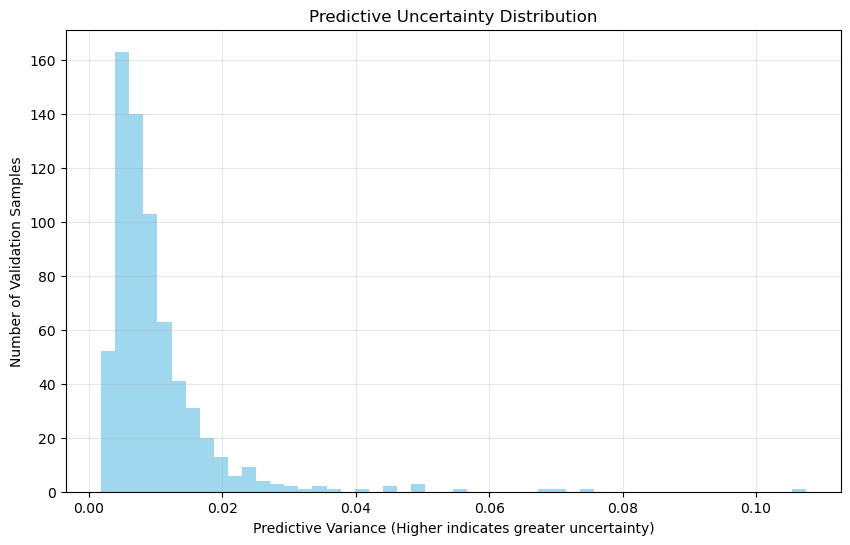

Top 10% high-uncertainty samples count: 67
Sample indices: [11 21 29 31 40 50 70 88 91 95]


In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Load datasets
training_variants = pd.read_csv("./extracted/training_variants")
training_text = pd.read_csv("./extracted/training_text", 
                            sep=r"\|\|", engine="python", 
                            names=["ID", "Text"], skiprows=1)

# Merge datasets on ID
train_data = pd.merge(training_variants, training_text, on="ID")

# Encode categorical variables
le_gene = LabelEncoder()
le_variation = LabelEncoder()

train_data['Gene_enc'] = le_gene.fit_transform(train_data['Gene'])
train_data['Variation_enc'] = le_variation.fit_transform(train_data['Variation'])

# TF-IDF vectorization for text data
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=3000)
text_tfidf = tfidf_vectorizer.fit_transform(train_data['Text'].fillna("")).toarray()

# Concatenate structured and text features
X_structured = train_data[['Gene_enc', 'Variation_enc']].values
X = np.hstack((X_structured, text_tfidf))

# Prepare labels (zero-indexed)
y = train_data['Class'].values - 1
y_onehot = tf.keras.utils.to_categorical(y, num_classes=len(np.unique(y)))

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, 
                                                  test_size=0.2, 
                                                  random_state=42)

# Define MC Dropout Model
def get_mc_dropout_model(input_dim, num_classes, dropout_rate=0.5):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Build and compile model
model = get_mc_dropout_model(X_train.shape[1], y_onehot.shape[1], dropout_rate=0.5)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_val, y_val))

# Monte Carlo Dropout Prediction Function
def mc_dropout_predict(model, X, num_samples=30):
    predictions = np.array([model(X, training=True).numpy() 
                            for _ in range(num_samples)])
    mean_preds = predictions.mean(axis=0)
    uncertainty = predictions.var(axis=0)
    return mean_preds, uncertainty

# Perform MC Dropout predictions
mean_preds, uncertainty = mc_dropout_predict(model, X_val, num_samples=30)

# Evaluate predictions
y_pred_classes = np.argmax(mean_preds, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

accuracy = accuracy_score(y_true_classes, y_pred_classes)
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
roc_auc = roc_auc_score(y_val, mean_preds, multi_class='ovr')

print("\nEvaluation Metrics with MC Dropout:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Weighted F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Analyze Uncertainty
predicted_class_uncertainty = uncertainty[np.arange(len(y_pred_classes)), y_pred_classes]

plt.figure(figsize=(10, 6))
plt.hist(predicted_class_uncertainty, bins=50, color='skyblue', alpha=0.8)
plt.title("Predictive Uncertainty Distribution")
plt.xlabel("Predictive Variance (Higher indicates greater uncertainty)")
plt.ylabel("Number of Validation Samples")
plt.grid(alpha=0.3)
plt.show()

# Example of uncertainty-based filtering
high_uncertainty_threshold = np.percentile(predicted_class_uncertainty, 90)
high_uncertainty_samples = np.where(predicted_class_uncertainty >= high_uncertainty_threshold)[0]

print(f"Top 10% high-uncertainty samples count: {len(high_uncertainty_samples)}")
print("Sample indices:", high_uncertainty_samples[:10])


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

--- Deterministic Model Metrics ---
Accuracy: 0.3744360902255639
F1-score: 0.258311241188402
ROC-AUC: 0.6715443368557077

--- Bayesian Model (MC Dropout) Metrics ---
Accuracy: 0.3819548872180451
F1-score: 0.28023349258470226
ROC-AUC: 0.6000314761205069

Deterministic Model ECE: 0.0261
Bayesian MC Dropout Model ECE: 0.0557


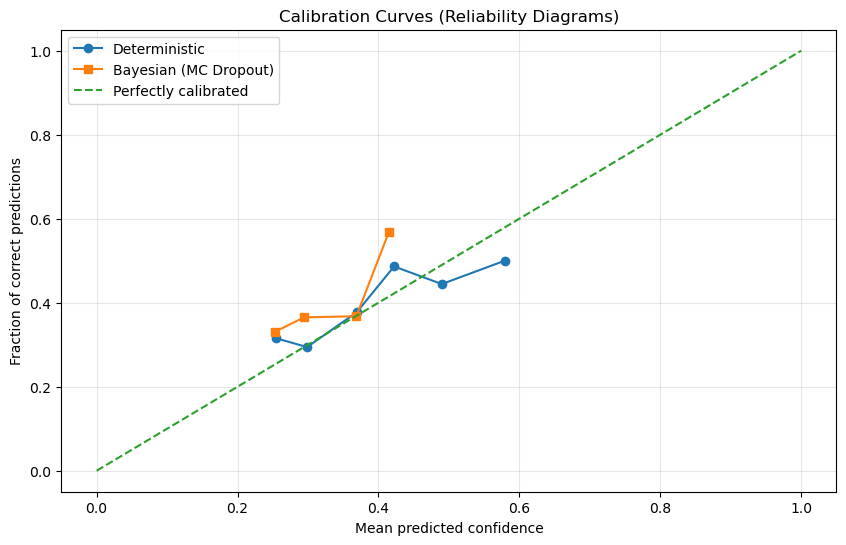


Top 10% High-Uncertainty Samples Count: 67
Indices of some high-uncertainty samples: [21 29 31 50 70 74 91 95 97 99]

Examples of High-Uncertainty Samples:


,True Class,Predicted Class,Uncertainty
0,6,6,0.025693
1,2,6,0.024362
2,4,6,0.030495
3,3,6,0.041174
4,6,6,0.019972
5,6,6,0.020735
6,3,6,0.051914
7,6,6,0.050675
8,5,6,0.018934
9,6,6,0.017891


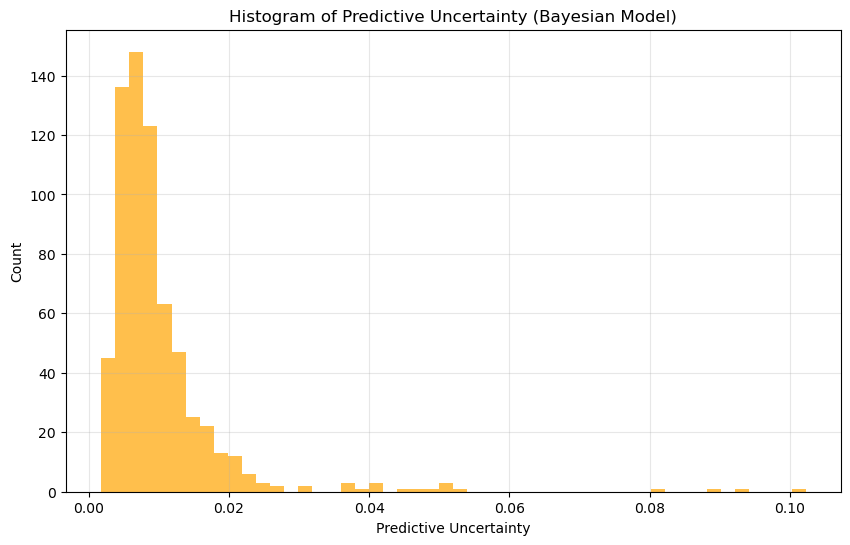

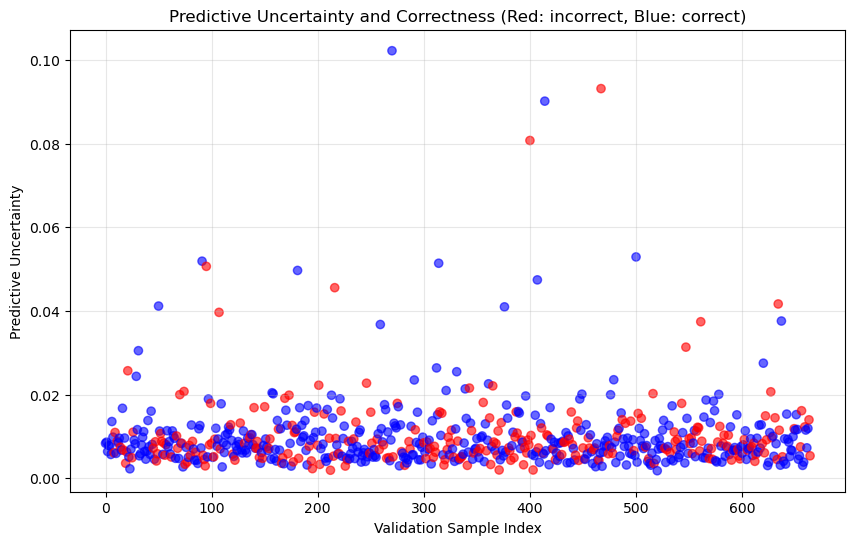

In [23]:
# Assume y_val, y_true_classes already defined from week 3
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Deterministic predictions (Week 2 model: softmax scores)
deterministic_preds = model.predict(X_val)
deterministic_pred_classes = np.argmax(deterministic_preds, axis=1)

# MC Dropout predictions (Week 3)
mean_preds, uncertainty = mc_dropout_predict(model, X_val, num_samples=30)
bayesian_pred_classes = np.argmax(mean_preds, axis=1)

# Performance Comparison
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

print("\n--- Deterministic Model Metrics ---")
print("Accuracy:", accuracy_score(y_true_classes, deterministic_pred_classes))
print("F1-score:", f1_score(y_true_classes, deterministic_pred_classes, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_val, deterministic_preds, multi_class='ovr'))

print("\n--- Bayesian Model (MC Dropout) Metrics ---")
print("Accuracy:", accuracy_score(y_true_classes, bayesian_pred_classes))
print("F1-score:", f1_score(y_true_classes, bayesian_pred_classes, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_val, mean_preds, multi_class='ovr'))


# Function to calculate Expected Calibration Error (ECE)
def expected_calibration_error(y_true, probs, n_bins=15):
    bin_edges = np.linspace(0, 1, n_bins + 1)
    confidences = np.max(probs, axis=1)
    predictions = np.argmax(probs, axis=1)
    accuracies = predictions == y_true

    ece = 0.0
    for i in range(n_bins):
        mask = (confidences >= bin_edges[i]) & (confidences < bin_edges[i + 1])
        bin_size = np.sum(mask)
        if bin_size > 0:
            accuracy_in_bin = np.mean(accuracies[mask])
            avg_confidence_in_bin = np.mean(confidences[mask])
            ece += (bin_size / len(y_true)) * np.abs(accuracy_in_bin - avg_confidence_in_bin)
    return ece

ece_deterministic = expected_calibration_error(y_true_classes, deterministic_preds)
ece_bayesian = expected_calibration_error(y_true_classes, mean_preds)

print(f"\nDeterministic Model ECE: {ece_deterministic:.4f}")
print(f"Bayesian MC Dropout Model ECE: {ece_bayesian:.4f}")


plt.figure(figsize=(10, 6))

# Deterministic model calibration
prob_true_det, prob_pred_det = calibration_curve(y_true_classes == deterministic_pred_classes,
                                                 np.max(deterministic_preds, axis=1),
                                                 n_bins=15)
plt.plot(prob_pred_det, prob_true_det, marker='o', label='Deterministic')

# Bayesian model calibration
prob_true_bay, prob_pred_bay = calibration_curve(y_true_classes == bayesian_pred_classes,
                                                 np.max(mean_preds, axis=1),
                                                 n_bins=15)
plt.plot(prob_pred_bay, prob_true_bay, marker='s', label='Bayesian (MC Dropout)')

plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted confidence')
plt.ylabel('Fraction of correct predictions')
plt.title('Calibration Curves (Reliability Diagrams)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# Identify top 10% most uncertain predictions
predicted_class_uncertainty = uncertainty[np.arange(len(bayesian_pred_classes)), bayesian_pred_classes]
threshold = np.percentile(predicted_class_uncertainty, 90)
high_uncertainty_indices = np.where(predicted_class_uncertainty >= threshold)[0]

print(f"\nTop 10% High-Uncertainty Samples Count: {len(high_uncertainty_indices)}")
print("Indices of some high-uncertainty samples:", high_uncertainty_indices[:10])

# Show some high-uncertainty examples
uncertain_samples = pd.DataFrame({
    'True Class': y_true_classes[high_uncertainty_indices],
    'Predicted Class': bayesian_pred_classes[high_uncertainty_indices],
    'Uncertainty': predicted_class_uncertainty[high_uncertainty_indices]
}).head(10)

print("\nExamples of High-Uncertainty Samples:")
display(uncertain_samples)


# Uncertainty histogram
plt.figure(figsize=(10, 6))
plt.hist(predicted_class_uncertainty, bins=50, color='orange', alpha=0.7)
plt.xlabel('Predictive Uncertainty')
plt.ylabel('Count')
plt.title('Histogram of Predictive Uncertainty (Bayesian Model)')
plt.grid(alpha=0.3)
plt.show()

# Uncertainty scatter plot (uncertainty vs. correctness)
correctness = bayesian_pred_classes == y_true_classes
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(correctness)), predicted_class_uncertainty,
            c=correctness, cmap='bwr', alpha=0.6)
plt.xlabel('Validation Sample Index')
plt.ylabel('Predictive Uncertainty')
plt.title('Predictive Uncertainty and Correctness (Red: incorrect, Blue: correct)')
plt.grid(alpha=0.3)
plt.show()

